# 非負矩陣分解(Non-negative Matrix Decomposition)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import logging
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm
from random import choices

# Dataset

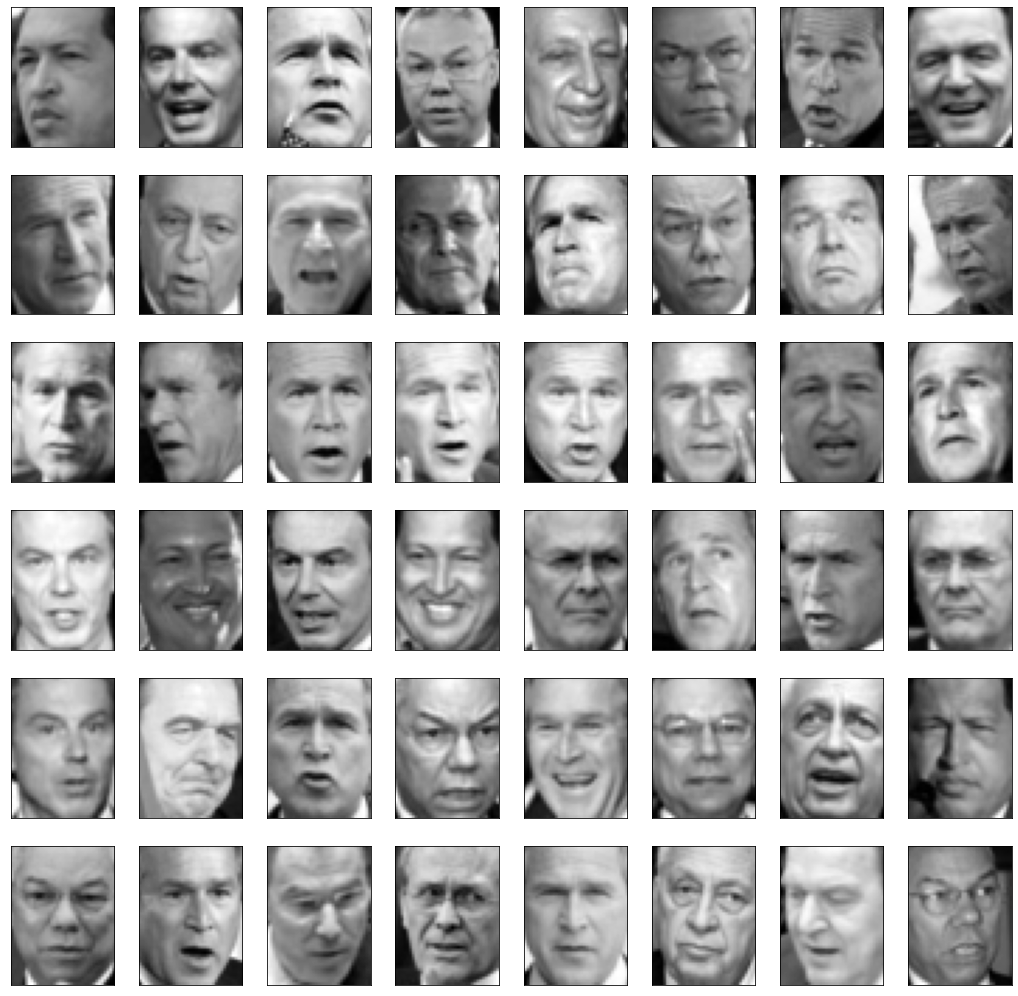

In [2]:
from sklearn.datasets import fetch_lfw_people
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X=lfw_people.data/256
y=lfw_people.target
n_samples, h, w = lfw_people.images.shape
X=X.T
plt.rcParams["figure.figsize"] = (18,18)
plt.gray()
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(X[:,i].reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show() 

# NMF

In [3]:
K=30
M,N=X.shape
W=np.random.rand(M,K)
H=np.linalg.lstsq(W,X,rcond=None)[0]
H=np.maximum(H, 1e-6)
for t in tqdm(range(1000)):
    top = np.dot(W.T,X)
    bottom = np.dot(np.dot(W.T,W),H)
    H *= top / bottom
    H = np.maximum(H, 1e-6)
    top = np.dot(X,H.T)
    bottom = np.dot(np.dot(W,H),H.T)
    W *= top / bottom
    W = np.maximum(W, 1e-6)

# Plot

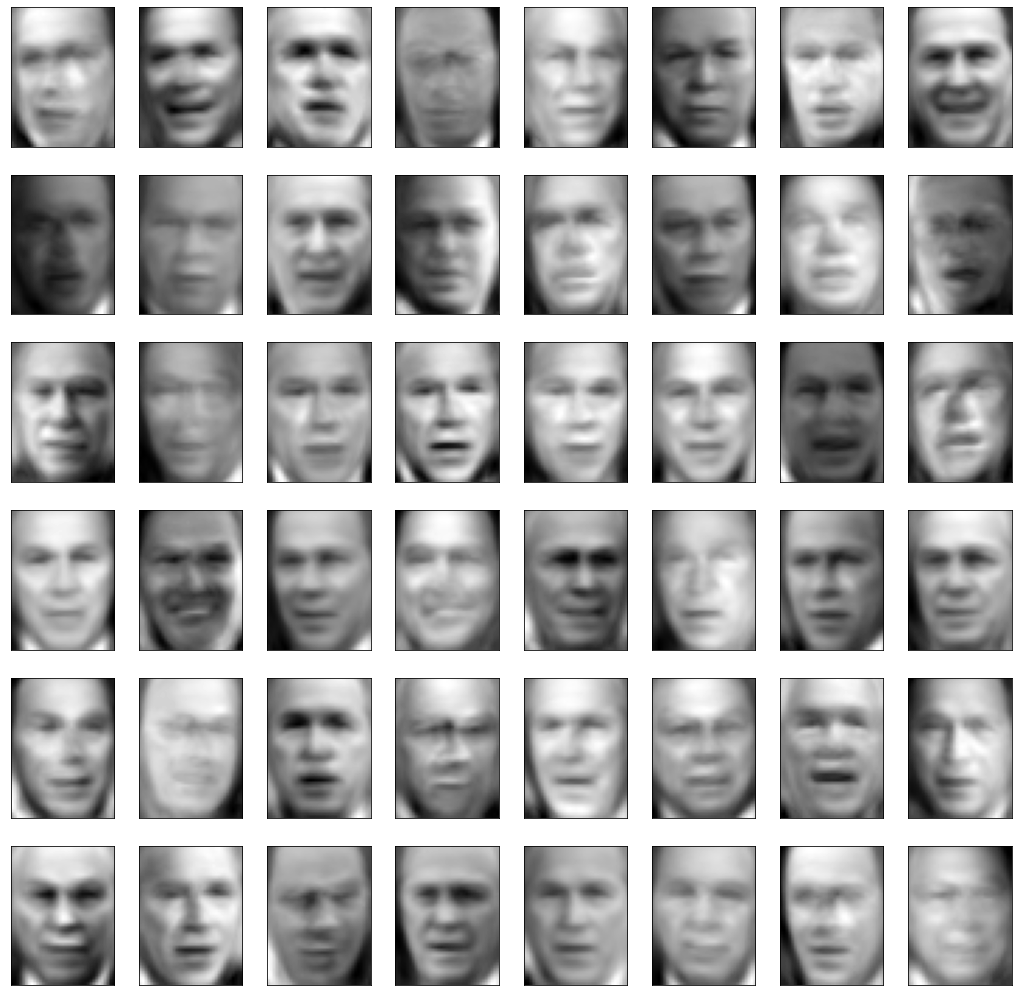

In [4]:
X_rec=np.dot(W,H)
plt.rcParams["figure.figsize"] = (18,18)
plt.gray()
for i in range(48):
    plt.subplot(6, 8, i + 1)
    plt.imshow(X_rec[:,i].reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.show() 